In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

with open(project_root / "data" / "protest" / "predictions.jsonl") as f:
    predictions = [json.loads(line) for line in f]

with open(project_root / "data" / "news" / "protest_news_shuffled_v2.jsonl") as f:
    news = [json.loads(line) for line in f]

In [3]:
protest_news = []
for prediction, article in zip(predictions, news):
    if prediction["label"] == "LABEL_1":
        for k, v in article["meta"].items():
            article[k] = v
        del article["meta"]
        article["score"] = prediction["score"]
        protest_news.append(article)

In [4]:
len(protest_news)

20879

In [5]:
protest_news.sort(key=lambda x: x["score"], reverse=True)

In [6]:
%%capture
protest_news[:5]

In [7]:
%%capture
protest_news[-5:]

In [8]:
%%capture
protest_news[-505:-500]

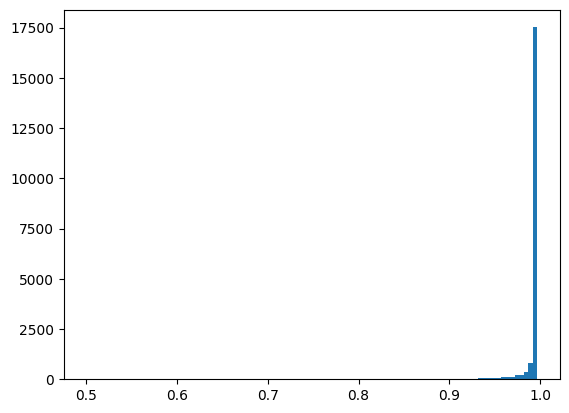

In [9]:
# plot distribution of scores
import matplotlib.pyplot as plt
import numpy as np

scores = [article["score"] for article in protest_news]
plt.hist(scores, bins=100)
plt.show()

In [10]:
with open(project_root / "data" / "protest" / "protest_news_predicted.jsonl", "w") as f:
    for article in protest_news:
        f.write(json.dumps(article) + "\n")

In [11]:
from src.data.protests.config import movement_keywords

topics = {}
for movement, keywords in movement_keywords.items():
    topics[movement] = []
    if "movement" in keywords:
        topics[movement] += keywords["movement"]
    if "topic" in keywords:
        topics[movement] += keywords["topic"]
    topics[movement] = [a.replace("*", "") for a in topics[movement]]

In [12]:
for article in protest_news:
    article["topics"] = []
    text = article["text"].lower()
    for movement, keywords in topics.items():
        for keyword in keywords:
            if keyword in text:
                article["topics"].append(movement)
                break

In [13]:
for article in protest_news:
    if len(article["topics"]) > 1:
        if "covid" in article["topics"]:
            article["topics"].remove("covid")
        elif "international" in article["topics"]:
            article["topics"].remove("international")

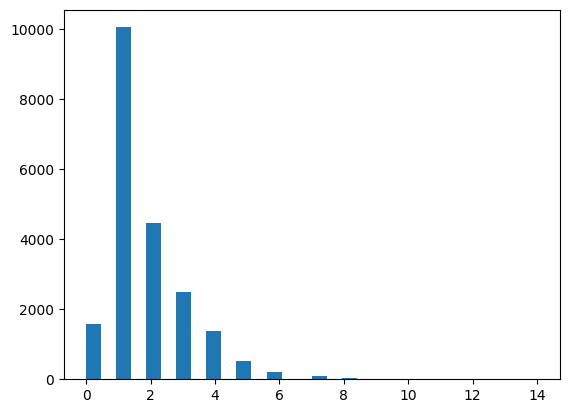

In [14]:
# plot distribution of number of topics per article
import matplotlib.pyplot as plt
import numpy as np

num_topics = [len(article["topics"]) for article in protest_news]
plt.hist(num_topics, bins=30)
plt.show()

In [15]:
from collections import Counter

Counter([str(sorted(a["topics"])) for a in protest_news]).most_common(50)

[("['international']", 2257),
 ("['labour']", 2009),
 ('[]', 1584),
 ("['covid']", 1393),
 ("['right wing']", 719),
 ("['racism']", 613),
 ("['climate']", 604),
 ("['feminism']", 486),
 ("['yellow jackets']", 425),
 ("['anti-immigration']", 314),
 ("['labour', 'yellow jackets']", 287),
 ("['anti capitalism']", 285),
 ("['international', 'labour']", 234),
 ("['anti-war']", 217),
 ("['climate', 'environment']", 212),
 ("['labour', 'right wing']", 181),
 ("['anti-immigration', 'right wing']", 164),
 ("['international', 'right wing']", 153),
 ("['racism', 'right wing']", 136),
 ("['left wing']", 133),
 ("['international', 'racism']", 130),
 ("['labour', 'racism']", 130),
 ("['feminism', 'labour']", 116),
 ("['left wing', 'right wing']", 115),
 ("['feminism', 'racism']", 105),
 ("['football']", 100),
 ("['environment']", 100),
 ("['refugees']", 94),
 ("['animal rights']", 82),
 ("['feminism', 'right wing']", 79),
 ("['bikes']", 79),
 ("['feminism', 'international']", 76),
 ("['labour', 'ref

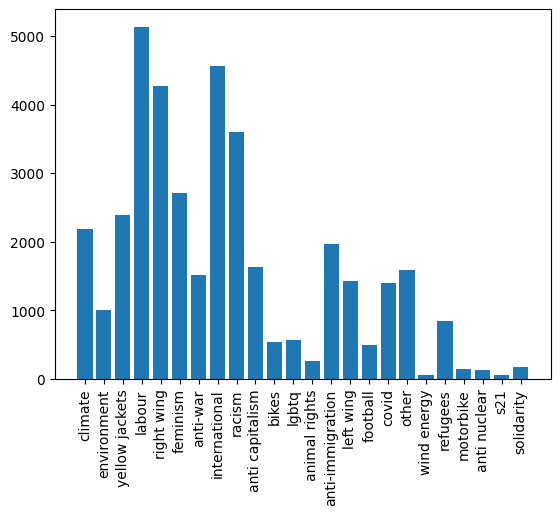

In [16]:
import matplotlib.pyplot as plt
import numpy as np

topics = [a["topics"] for a in protest_news]
topics = [["other"] if len(a) == 0 else a for a in topics]
topics = [item for sublist in topics for item in sublist]
topic_counts = Counter(topics)
plt.bar(topic_counts.keys(), topic_counts.values())
plt.xticks(rotation=90)
plt.show()

In [17]:
no_topic = [a for a in protest_news if len(a["topics"]) == 0]
len(no_topic)

1584

In [18]:
import random

random.seed(20230213)
random.shuffle(no_topic)
for article in no_topic[:3]:
    print(article["text"])

[Roding: Protest gegen AfD am Esper - Cham - idowa]

Auch wenn der Landtagsbus der AfD mit deutlicher Verspätung am Esper in Roding vorfuhr, protestiert haben Angehörige und Bürger des Bündnisses für Toleranz und Menschlichkeit im Landkreis Cham, "Cham gegen rechts", schon vor dessen Ankunft.

Auch rund ein Dutzend Polizeibeamte hatte sich eingefunden, um im Fall des Falles einzuschreiten. Was aber nicht nötig war.

Den vollständigen Artikel lesen Sie als Abonnent kostenlos auf idowa.plus oder in Ihrer Tageszeitung vom 21. Dezember 2019.

Übrigens: Die Einzelausgabe des ePapers, in dem dieser Artikel erscheint, ist ab 21. Dezember 2019 verfügbar. Klicken Sie auf ePaper und geben Ihren Suchbegriff ein. Es werden Ihnen dann alle Ausgaben angezeigt, in denen sich der Artikel befindet.
[„Pulse of Europe“ demonstriert wieder]

25\. Februar 2018 um 18:45 Uhr

##  „Pulse of Europe“ demonstriert wieder

Nach der Pause trafen sich die Pro-Europäer wieder auf dem Burgplatz.

Blaue Luftballons un

In [19]:
with open(project_root / "data" / "protest" / "protest_news_predicted.jsonl", "w") as f:
    for article in protest_news:
        f.write(json.dumps(article) + "\n")

In [20]:
# plot timeline of articles per topic
import pandas as pd
from dateutil import parser

common_topics = [k for k, v in topic_counts.most_common(15)]

data = []
for article in protest_news:
    date = parser.parse(article["date"], yearfirst=True, dayfirst=False).date()
    yearquarter = f"{date.year}-{(date.month // 3)*3}"
    yearmonth = f"{date.year}-{str(date.month).zfill(2)}"
    if date.year < 2014:
        continue
    for topic in article["topics"]:
        # if topic not in common_topics:
        #     continue
        data.append({"date": date, "yearmonth": yearmonth, "topic": topic})
df_protest_counts = pd.DataFrame(data)
df_protest_counts.head()

,date,yearmonth,topic
0,2020-10-31,2020-10,climate
1,2020-10-31,2020-10,environment
2,2020-02-22,2020-02,climate
3,2020-02-22,2020-02,yellow jackets
4,2021-01-30,2021-01,labour


In [21]:
# aggregate by month
df = df_protest_counts.copy()
df = df.groupby(["yearmonth", "topic"]).size().reset_index(name="count")
df.head()

,yearmonth,topic,count
0,2014-01,animal rights,1
1,2014-01,anti-war,1
2,2014-01,climate,2
3,2014-01,environment,3
4,2014-01,feminism,3


In [22]:
# normalize by month
df["count"] = df["count"] / df.groupby("yearmonth")["count"].transform("sum")
df.head()

,yearmonth,topic,count
0,2014-01,animal rights,0.04
1,2014-01,anti-war,0.04
2,2014-01,climate,0.08
3,2014-01,environment,0.12
4,2014-01,feminism,0.12


In [23]:
import altair as alt

# plot timeline of proportion of articles per topic
alt.Chart(df).mark_bar().encode(
    x="yearmonth:T",
    y=alt.Y("count:Q"),
    color="topic:N",
    row="topic:N",
).properties(
    width=800,
    height=50,
)

alt.Chart(...)

In [40]:
df_topic_counts = pd.read_csv(project_root / "data" / "protest" / "topic_counts.csv")
df_topic_counts.head()

,count,date,media_id,name,keyword
0,1,2013-03-13,39267,hna,klima
1,1,2013-03-24,39267,hna,klima
2,1,2013-03-29,39267,hna,klima
3,1,2013-04-04,39267,hna,klima
4,1,2013-04-15,39267,hna,klima


In [41]:
# add column with "topic" (aka movement) (derived from column "keyword")
def find_movement(keyword):
    for movement, keywords in movement_keywords.items():
        if "topic" in keywords and keyword in keywords["topic"]:
            return movement
    return "other"


df_topic_counts["topic"] = df_topic_counts["keyword"].apply(find_movement)
df_topic_counts.head()

,count,date,media_id,name,keyword,topic
0,1,2013-03-13,39267,hna,klima,climate
1,1,2013-03-24,39267,hna,klima,climate
2,1,2013-03-29,39267,hna,klima,climate
3,1,2013-04-04,39267,hna,klima,climate
4,1,2013-04-15,39267,hna,klima,climate


In [42]:
# only keep columns "date", "topic", "count"
# df_topic_counts = df_topic_counts[["date", "topic", "count"]]
df_topic_counts = (
    df_topic_counts.groupby(["date", "topic", "media_id", "name", "keyword"])
    .size()
    .reset_index(name="count")
)
df_topic_counts["type"] = "general"
df_topic_counts.head()

,date,topic,media_id,name,keyword,count,type
0,2010-01-09,feminism,119705,kreiszeitung.de,frau*,1,general
1,2010-02-08,covid,69752,augsburger-allgemeine.de,impf*,1,general
2,2010-02-08,feminism,69752,augsburger-allgemeine.de,frau*,1,general
3,2010-03-01,racism,144263,bz-berlin.de,rassis*,1,general
4,2010-03-09,feminism,69752,augsburger-allgemeine.de,frau*,1,general


In [43]:
# aggregate df_protest_counts by date
df_protest_counts = (
    df_protest_counts.groupby(["date", "topic"]).size().reset_index(name="count")
)
df_protest_counts = df_protest_counts[["date", "topic", "count"]]
df_protest_counts["type"] = "protest"
df_protest_counts.head()

,date,topic,count,type
0,2014-01-03,feminism,1,protest
1,2014-01-03,labour,1,protest
2,2014-01-03,racism,1,protest
3,2014-01-03,yellow jackets,1,protest
4,2014-01-04,anti-war,1,protest


In [44]:
# merge df_protest_counts and df_topic_counts
df_protests_and_topics = pd.concat([df_protest_counts, df_topic_counts])
df_protests_and_topics.head()

,date,topic,count,type,media_id,name,keyword
0,2014-01-03,feminism,1,protest,NaN,NaN,NaN
1,2014-01-03,labour,1,protest,NaN,NaN,NaN
2,2014-01-03,racism,1,protest,NaN,NaN,NaN
3,2014-01-03,yellow jackets,1,protest,NaN,NaN,NaN
4,2014-01-04,anti-war,1,protest,NaN,NaN,NaN


In [45]:
df_protests_and_topics.to_csv(
    project_root / "data" / "protest" / "protest_and_topic_counts.csv", index=False
)

In [46]:
len(df_protests_and_topics)

1357586

In [47]:
df = df_protests_and_topics.copy()
# aggregate by month
df["date"] = pd.to_datetime(df["date"]).dt.to_period("M")
df["date"] = df["date"].astype(str)
df = df.groupby(["date", "topic", "type"]).sum().reset_index()
df.head()

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_67922/4195573180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(["date", "topic", "type"]).sum().reset_index()


,date,topic,type,count,media_id
0,2010-01,feminism,general,1,119705.0
1,2010-02,covid,general,1,69752.0
2,2010-02,feminism,general,1,69752.0
3,2010-03,anti-war,general,1,144263.0
4,2010-03,feminism,general,2,449087.0


In [48]:
len(df)

4004

In [49]:
# start in 2014
df = df[df["date"] >= "2014-01"]

In [50]:
df_norm_topic = df.copy()
# normalize counts by topic
df_norm_topic["count"] = df_norm_topic["count"] / df_norm_topic.groupby(
    ["topic", "type"]
)["count"].transform("max")

In [51]:
import altair as alt

alt.Chart(df_norm_topic).mark_bar(opacity=0.5).encode(
    x="date:T",
    y=alt.Y("count:Q", stack=None),
    color="type:N",
    row="topic:N",
).properties(
    width=800,
    height=50,
)

alt.Chart(...)

In [52]:
df_norm_time = df.copy()
# normalize protest counts and general counts by month
df_norm_time["count"] = df_norm_time["count"] / df_norm_time.groupby(["date", "type"])[
    "count"
].transform("sum")
df.head()

,date,topic,type,count,media_id
284,2014-01,animal rights,general,60,13728431.0
285,2014-01,animal rights,protest,1,0.0
286,2014-01,anti capitalism,general,37,8109431.0
287,2014-01,anti nuclear,general,27,5051838.0
288,2014-01,anti-immigration,general,255,47459960.0


In [53]:
df_norm_time_norm_topic = df_norm_time.copy()
# normalize counts by topic
df_norm_time_norm_topic["count"] = df_norm_time_norm_topic[
    "count"
] / df_norm_time_norm_topic.groupby(["topic", "type"])["count"].transform("max")

In [54]:
import altair as alt

alt.Chart(df_norm_time_norm_topic).mark_bar(opacity=0.5).encode(
    x="date:T",
    y=alt.Y("count:Q", stack=None),
    color="type:N",
    row="topic:N",
).properties(
    width=800,
    height=50,
)

alt.Chart(...)